## Assignment
## Hyperparameters search
**<div style="text-align: right"> [Total score: 10]</div>**
When creating a machine learning model, we can choose among many design choices and explore a range of possibilities without knowing which model architecture can provide the best optimal solution. We can even ask the machine to perform this exploration and select the optimal model architecture automatically. Parameters which define the model architecture are referred to as hyperparameters and this process of searching for the ideal model architecture is referred to as hyperparameter tuning.

Unlike model parameters, hyperparameters cannot be directly trained from the data. Unfortunately, there's no way to calculate “which way should I update my hyperparameter to reduce the loss?” (ie. gradients) in order to find the optimal model architecture; thus, we generally resort to experimentation to figure out what works best.

In this assignment, we will use digits datasets of <a href="http://yann.lecun.com/exdb/mnist/">MNIST</a> and apply grid search, random search and evolutionary search from scikit-learn to find the best parameters.

### Exercise 1
**<div style="text-align: right"> [Score: 1]</div>**
1. Import `numpy`,  `pandas` and `matplotlib.pyplot`.
2. Import `StratifiedKFold`, `GridSearchCV` and `RandomizedSearchCV` from `sklearn`.
3. Import `EvolutionaryAlgorithmSearchCV` from `evolutionary_search`.
4. Import `SVC` from `sklearn.svm`.
5. Import `datasets` from `sklearn` 

In [2]:
# YOUR CODE HERE
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

from evolutionary_search import EvolutionaryAlgorithmSearchCV
from sklearn.svm import SVC

from sklearn.datasets import load_digits
#raise NotImplementedError()

/home/anish/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
### INTENTIONALLY LEFT BLANK

### Exercise 2
**<div style="text-align: right"> [Score: 1]</div>**
Load the digits dataset from `sklearn.datasets`.

In [4]:
digits = load_digits()
print(digits.data.shape)
# YOUR CODE HERE
#raise NotImplementedError()

(1797, 64)


In [ ]:
### INTENTIONALLY LEFT BLANK

The MNIST database consists of handwritten digits from 0-9, and incorporates a training set of 60,000 examples and a test set of 10,000 examples.

Check the contents of the digits datasets with the notebook.

<Figure size 432x288 with 0 Axes>

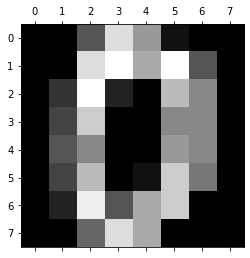

In [5]:
# Check out the contents of the dataset here
import matplotlib.pyplot as plt 
plt.gray()
plt.matshow(digits.images[0])
plt.show()

### Exercise 3
**<div style="text-align: right"> [Score: 1]</div>**
Set data of the digits to matrix `X` and the target values to vector `y`.

In [14]:
X = digits.data
y = digits.target
# YOUR CODE HERE
#raise NotImplementedError()

In [ ]:
### INTENTIONALLY LEFT BLANK

### Grid Search

Grid-search determines the optimal parameters for a model while scanning the data. It can be useful for finding the best parameters of many kinds of machine learning model. However, as search builds and stores a model for each parameter combination, it can be computationally expensive.

We will be searching the best parameters in the following param_grid while implementing grid search and randomized search.

### Exercise 4
**<div style="text-align: right"> [Score: 1]</div>**
Use grid search to find the best parameters using scikit-learn:
1. Set estimator to `SVC` and `param_grid` to the parameters given as `param_grid`. 
2. Use `StratifiedKFold` cross validation with `n_splits` = 2. 
3. Use accuracy as the scoring metric.
4. Set `refit` to `True`.

[What is StratifiedKFold ?](https://stats.stackexchange.com/questions/49540/understanding-stratified-cross-validation)

In [19]:
param_grid = { "C":np.logspace(-7,7, num=5, base=10),"gamma":np.logspace(-7, 7, num=5, base=10)}
cv = GridSearchCV(estimator=SVC(),param_grid=param_grid, refit=True,cv=StratifiedKFold(n_splits = 2))
# YOUR CODE HERE
#raise NotImplementedError()
cv.fit(X, y)

GridSearchCV(cv=StratifiedKFold(n_splits=2, random_state=None, shuffle=False),
             error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.00000000e-07, 3.16227766e-04, 1.00000000e+00, 3.16227766e+03,
       1.00000000e+07]),
                         'gamma': array([1.00000000e-07, 3.16227766e-04, 1.00000000e+00, 3.16227766e+03,
       1.00000000e+07])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
### INTENTIONALLY LEFT BLANK

### Exercise 5
**<div style="text-align: right"> [Score: 1]</div>**
Find the mean cross-validated score of the best_estimator using best_score_ on our model.

In [20]:
best_score = cv.best_score_
# YOUR CODE HERE
#raise NotImplementedError()
print(best_score)

0.9588233399644742


In [ ]:
### INTENTIONALLY LEFT BLANK

Now, you can also check the best parameters selected by our grid search model.

In [21]:
cv.best_params_

{'C': 3162.2776601683795, 'gamma': 0.00031622776601683794}

### Exercise 6
**<div style="text-align: right"> [Score: 1]</div>**

Store the five highest mean test score from our model in `results`.

In [25]:
results = None
# YOUR CODE HERE
#raise NotImplementedError()

In [26]:
### INTENTIONALLY LEFT BLANK

### Exercise 7
**<div style="text-align: right"> [Score: 1]</div>**
Convert the `results` dataframe to a pickle and save it to the file `results.pkl`.

In [28]:
import pickle
results_in_pickle = 'results.pkl' #Convert dataframe to pickle
# YOUR CODE HERE
pickle.dump(results,open(results_in_pickle, 'wb'))
#raise NotImplementedError()

In [ ]:
### INTENTIONALLY LEFT BLANK

### Random search

Random search finds the optimal number of parameters as grid search. However, random search tries only a fixed number of random parameter settings. The numbers of different parameters to be tried out can be specified in `n_iter`.

### Exercise 8
**<div style="text-align: right"> [Score: 1]</div>**
Use random search to find the best parameters using scikit-learn:
1. Set `estimator` to `SVC` and `param_distribution` to the parameters given above. 
2. Use `StratifiedKFold` cross validation with `n_splits = 2`. 
3. Use "accuracy" as the scoring metric.
4. Set `refit` to `True`.
5. Set number of iterations to 10 and `random_state` to 0.

In [23]:
cv = RandomizedSearchCV(estimator=SVC(),param_distributions=param_grid, refit=True,scoring='accuracy',
                        cv=StratifiedKFold(n_splits = 2), random_state = 0, n_iter = 10)

# YOUR CODE HERE
#raise NotImplementedError()
cv.fit(X, y)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=2, random_state=None, shuffle=False),
                   error_score=nan,
                   estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                 class_weight=None, coef0=0.0,
                                 decision_function_shape='ovr', degree=3,
                                 gamma='scale', kernel='rbf', max_iter=-1,
                                 probability=False, random_state=None,
                                 shrinking=True, tol=0.001, verbose=False),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'C': array([1.00000000e-07, 3.16227766e-04, 1.00000000e+00, 3.16227766e+03,
       1.00000000e+07]),
                                        'gamma': array([1.00000000e-07, 3.16227766e-04, 1.00000000e+00, 3.16227766e+03,
       1.00000000e+07])},
                   pre_dispatch='2*n_jobs', random_state=0, refit=True,
                   return_

In [ ]:
### INTENTIONALLY LEFT BLANK

Now, let's observe the best score and best parameters chosen by our model.

In [24]:
cv.best_score_, cv.best_params_

(0.9588233399644742,
 {'gamma': 0.00031622776601683794, 'C': 3162.2776601683795})

### Genetic Algorithm

<b>Genetic Algorithm</b> is one of the most powerful optimization algorithms based on natural selection and is inspired by Darwin's theory of evolution.

<br>The basic components common to most genetic algorithms are:
<br>• fitness function for optimization
<br>• population of chromosomes
<br>• selection of the chromosomes for reproduction
<br>• crossover and produce next generation of chromosomes
<br>• a random mutation of chromosomes in new generation

Scikit-learn provides sklearn-deap to use evolutionary algorithms. The evolutionary algorithms exponentially reduces the time entailed to find the best parameters by evolving over only the combinations that give the best results instead of trying out every possible combinations.

Now, let's use evolutionary search to find the best parameters.

### Exercise 9
**<div style="text-align: right"> [Score: 1]</div>**
Use evolutionary search algorithm to find the best parameters using scikit-learn:
1. Set `estimator` to `SVC` and `param_distribution` to the parameters given above. 
2. Use `StratifiedKFold` cross validation with `n_splits` = 2. 
3. Use accuracy as the scoring metric.
4. Set `population_size` to 10, `gene_mutation_prob` to 0.10 and `tournament_size` to 3.
5. Set `generations_number` to 10.

In [29]:
cv = EvolutionaryAlgorithmSearchCV(estimator=SVC(),params=param_grid, scoring='accuracy',
                        cv=StratifiedKFold(n_splits = 2),population_size =10, gene_mutation_prob = 0.10,
                                  tournament_size = 3, generations_number =10)

# YOUR CODE HERE
#raise NotImplementedError()
%time cv.fit(X, y)

CPU times: user 3.94 s, sys: 17.7 ms, total: 3.95 s
Wall time: 4.67 s


In [ ]:
### INTENTIONALLY LEFT BLANK

### Exercise 10
**<div style="text-align: right"> [Score: 1]</div>**
Find the best score and best parameters choosen by evolutionary search algorithm and assign them to the variables `best_score` and `best_params` respectively.

In [31]:
best_score = cv.best_score_
best_params = cv.best_params_

# YOUR CODE HERE
#raise NotImplementedError()

print(best_score)
print(best_params)

0.9588202559821926
{'C': 10000000.0, 'gamma': 0.00031622776601683794}


In [ ]:
### INTENTIONALLY LEFT BLANK

You might have observe the increase in speed while using evolutionary search over grid search and random search. This is why evolutionary search are more popular these days.

Congratulations, you have implemented grid search, random search and evolutionary search on the mnist digits dataset.